## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [88]:
df = pd.read_csv('../data/cleaned.csv')
df

,AfterProbiotic,(12 or 13)-methylmyristate (a15:0 or i15:0),(14 or 15)-methylpalmitate (a17:0 or i17:0),(16 or 17)-methylstearate (a19:0 or i19:0),(3'-5')-adenylyladenosine*,(3'-5')-adenylylcytidine,(3'-5')-adenylyluridine,(3'-5')-cytidylylcytidine*,(3'-5')-cytidylylguanosine,(3'-5')-cytidylyluridine*,...,sedoheptulose,suberate (C8-DC),succinate,succinimide,threonate,tricarballylate,urate,xylose,mouseID,isMale
0,0,0.097699,0.031264,0.011751,0.002530,0.001595,0.002532,0.002700,0.001522,0.002641,...,0.040729,0.024735,0.347333,0.021981,0.155677,0.241432,0.048367,0.149068,1,1
1,1,0.158941,0.033450,0.010874,0.000659,0.000659,0.000659,0.000659,0.000659,0.001236,...,0.034188,0.042743,0.374643,0.033852,0.088292,0.078611,0.044431,0.180184,1,1
2,0,0.119596,0.034288,0.011585,0.001485,0.000785,0.001638,0.001818,0.000785,0.001973,...,0.060845,0.033103,0.286650,0.030653,0.116940,0.197009,0.045180,0.168328,2,1
3,1,0.130916,0.037041,0.015447,0.000921,0.000921,0.000921,0.000921,0.000921,0.000921,...,0.091777,0.035994,0.442962,0.022208,0.078139,0.105422,0.032510,0.140046,2,1
4,0,0.103788,0.037460,0.014543,0.002526,0.002436,0.002764,0.003566,0.000709,0.003389,...,0.034373,0.032385,0.286454,0.028730,0.195996,0.328468,0.057677,0.072740,3,1
5,1,0.154498,0.036943,0.014053,0.003345,0.002256,0.003578,0.003453,0.002385,0.003525,...,0.058926,0.044877,0.361670,0.031210,0.124713,0.139020,0.063091,0.093225,3,1
6,0,0.178249,0.040164,0.015899,0.003001,0.002235,0.003103,0.003046,0.000941,0.003117,...,0.021816,0.030599,0.344763,0.029454,0.153957,0.253468,0.063587,0.118900,4,0
7,1,0.111626,0.030752,0.011096,0.000832,0.000832,0.000832,0.000832,0.000832,0.000832,...,0.021584,0.033518,0.245637,0.020587,0.185380,0.159851,0.082961,0.101554,4,0
8,0,0.160207,0.038966,0.013056,0.002832,0.001893,0.003246,0.000934,0.000934,0.002383,...,0.026331,0.027682,0.240438,0.023459,0.121336,0.197046,0.052422,0.287363,5,0
9,1,0.129253,0.031197,0.011793,0.001061,0.001061,0.001061,0.003476,0.001061,0.003567,...,0.023904,0.030442,0.216346,0.024343,0.199169,0.174640,0.081636,0.055060,5,0


In [152]:
# run only if jupyterthemes installed

# import jtplot module in notebook
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')
# jtplot.reset()

## PCA

In [153]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
components = pca.fit_transform(df.iloc[:, 1:-2])
pcaDF = pd.DataFrame(data = components
             , columns = ['PC1', 'PC2', 'PC3'])
pcaDFPlot = pd.concat([pcaDF, df['AfterProbiotic'].map({True : "Week 12", False : "Day 7"})], axis=1)
pcaDFPlot

,PC1,PC2,PC3,AfterProbiotic
0,-0.009878,-0.057891,0.255122,Day 7
1,0.334080,-0.063522,-0.010947,Week 12
2,0.136396,-0.044269,0.235231,Day 7
3,0.530867,-0.106464,-0.159191,Week 12
4,-0.291148,-0.078228,0.128555,Day 7
5,0.197594,-0.148634,-0.098439,Week 12
6,-0.117286,0.303090,-0.115930,Day 7
7,-0.345870,-0.135466,-0.063288,Week 12
8,0.018531,0.484733,0.005153,Day 7
9,-0.453286,-0.153350,-0.176267,Week 12


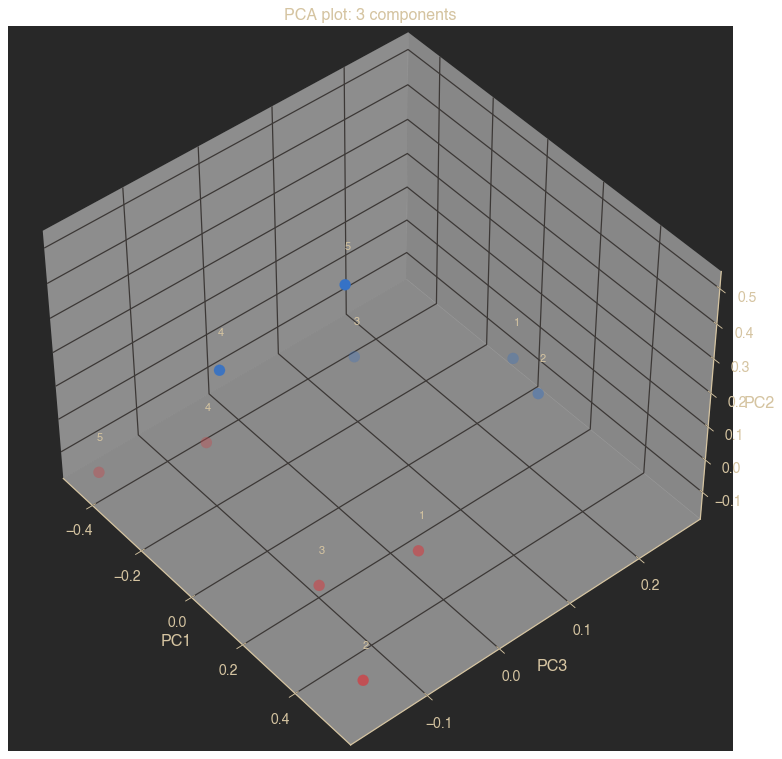

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# plt.style.use('dark_background')

fig = plt.figure(figsize=(12, 12), dpi=80)
ax = fig.add_subplot(projection='3d')


col = np.where(df['AfterProbiotic'],'r', 'b')
ax.scatter(xs=pcaDF['PC1'], ys=pcaDF['PC3'], zs=pcaDF['PC2'], c=col, s=100)

ax.set_xlabel('PC1')
ax.set_ylabel('PC3')
ax.set_zlabel('PC2')
ax.set_zlim(min(pcaDF['PC2']) * 1.1, max(pcaDF['PC2']) * 1.1)
ax.set_xlim(min(pcaDF['PC1']) * 1.1, max(pcaDF['PC1']) * 1.1)
ax.set_ylim(min(pcaDF['PC3']) * 1.1, max(pcaDF['PC3']) * 1.1)

# set view angle
ax.view_init(elev=45., azim=320)


# label samples

xs=pcaDF['PC1']
ys=pcaDF['PC3']
zs=pcaDF['PC2']

for i in range(10):
    label = i // 2 + 1
    ax.text(xs[i], ys[i], zs[i] + 0.1, label)
ax.title.set_text("PCA plot: 3 components")

#### 3d plot is a bit ugly ^

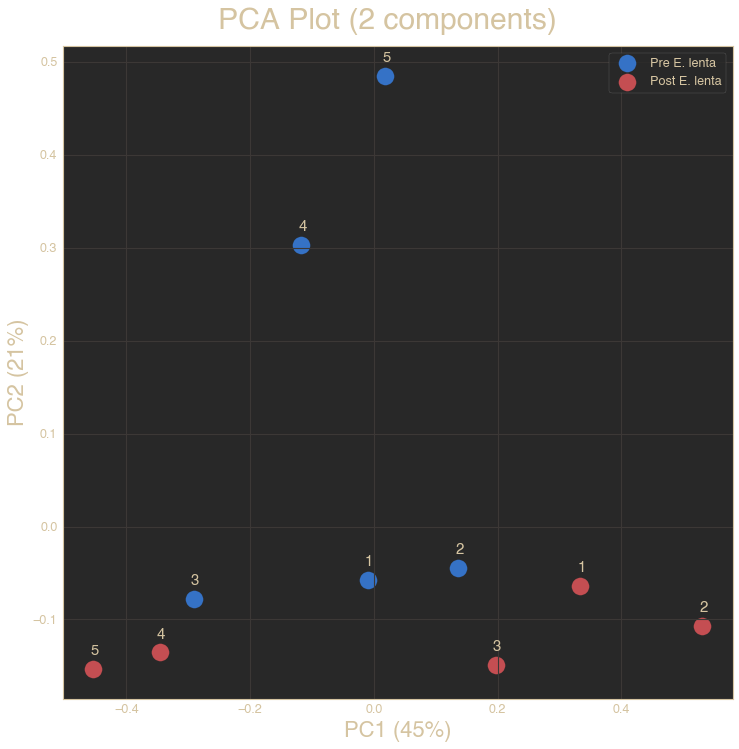

In [159]:
fig = plt.figure(figsize=(12,12))
before = components[(0, 2, 4, 6, 8), :]
after = components[(1, 3, 5, 7, 9), :]
plt.scatter(before[:, 0], before[:, 1], c='b', s=300, label='Pre E. lenta')
plt.scatter(after[:, 0], after[:, 1], c='r', s=300, label='Post E. lenta')
pca1_ratio, pca2_ratio = pca.explained_variance_ratio_[:2]
font = {'weight' : 'bold', 'size' : 22}
plt.xlabel('PC1 ({:.0%})'.format(pca1_ratio), font=font)
plt.ylabel('PC2 ({:.0%})'.format(pca2_ratio), font=font)
for i in range(10):
    label = i // 2 + 1
    plt.text(xs[i] - 0.005, zs[i] + 0.015, label, font = {
        'weight' : 'bold',
        'size'   : 15
    })
plt.legend()
plt.figtext(.5,.9,'PCA Plot (2 components)',fontsize=30,ha='center')
plt.savefig('../output/pca.png')

## Hierarchical Clustering

In [156]:
cluster_df = df.iloc[:, 1:-2].T
cluster_df.rename(
    mapper=(lambda x : ((x + 2) // 2)), inplace=True, axis=1)
cluster_df

,1,1,2,2,3,3,4,4,5,5
(12 or 13)-methylmyristate (a15:0 or i15:0),0.097699,0.158941,0.119596,0.130916,0.103788,0.154498,0.178249,0.111626,0.160207,0.129253
(14 or 15)-methylpalmitate (a17:0 or i17:0),0.031264,0.033450,0.034288,0.037041,0.037460,0.036943,0.040164,0.030752,0.038966,0.031197
(16 or 17)-methylstearate (a19:0 or i19:0),0.011751,0.010874,0.011585,0.015447,0.014543,0.014053,0.015899,0.011096,0.013056,0.011793
(3'-5')-adenylyladenosine*,0.002530,0.000659,0.001485,0.000921,0.002526,0.003345,0.003001,0.000832,0.002832,0.001061
(3'-5')-adenylylcytidine,0.001595,0.000659,0.000785,0.000921,0.002436,0.002256,0.002235,0.000832,0.001893,0.001061
...,...,...,...,...,...,...,...,...,...,...
succinimide,0.021981,0.033852,0.030653,0.022208,0.028730,0.031210,0.029454,0.020587,0.023459,0.024343
threonate,0.155677,0.088292,0.116940,0.078139,0.195996,0.124713,0.153957,0.185380,0.121336,0.199169
tricarballylate,0.241432,0.078611,0.197009,0.105422,0.328468,0.139020,0.253468,0.159851,0.197046,0.174640
urate,0.048367,0.044431,0.045180,0.032510,0.057677,0.063091,0.063587,0.082961,0.052422,0.081636


In [157]:
import seaborn as snb
methods = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']

<Figure size 432x288 with 0 Axes>

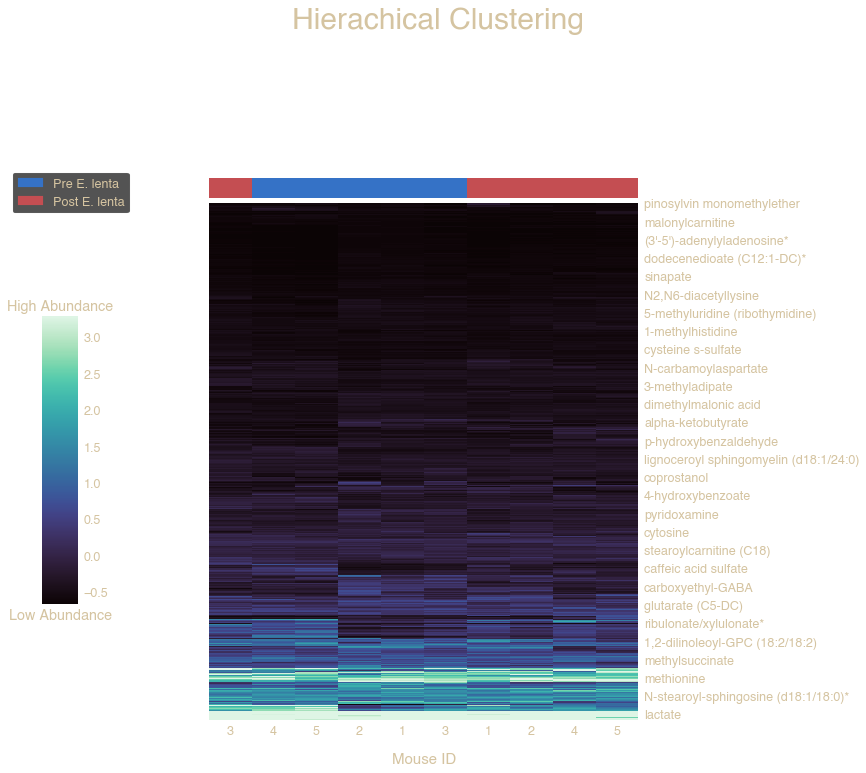

In [197]:
import seaborn as snb
fig = plt.figure()

ax = snb.clustermap(cluster_df.iloc[1:, :], robust=True, cmap="mako", 
                    col_colors=['r', 'b']*10,
                    metric='chebyshev', z_score=1,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(-0.15, .2, .05, .4),
                   tree_kws = {'colors' : (1, 1, 1)})
ax.cax.set_title("High Abundance")
plt.xlabel('Low Abundance')

plt.figtext(.4, 1,'Hierachical Clustering',fontsize=30,ha='center')
plt.figtext(.38, -0.02,'Mouse ID',fontsize=15,ha='center')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='b', edgecolor='b', label='Pre E. lenta'),
    Patch(facecolor='r', edgecolor='r', label='Post E. lenta')
                  ]

plt.legend(handles=legend_elements, bbox_to_anchor=(-1, 1.52), loc='upper left')

plt.show()
ax.savefig('../output/hierachical.png')

## Box Plots

In [198]:
box_list = [
"myristoleate (14:1n5)",
"palmitoleoyl ethanolamide*",
"deoxycholate",
"serotonin",
"lithocholate",
"alpha-muricholate",
"pyridoxine (Vitamin B6)",
"dihydoxyphenylalanine (L-DOPA)",
"taurocholate",
"docosahexaenoate (DHA; 22:6n3)",
"docosapentaenoate (n3 DPA; 22:5n3)",
"enterodiol",
"oleoyl ethanolamide",
"octadecanedioate (C18-DC)",
"dihomo-linolenate (20:3n3 or n6)",
"tauro-beta-muricholate",
"beta-muricholate",
"hyodeoxycholate",
"stearoyl ethanolamide",
"cholesterol",
"valine",
"pyridoxal",
"campesterol",
"valerate (5:0)",
]
len(box_list)

24

In [199]:
pre = df[df['AfterProbiotic'] == 0]
post = df[df['AfterProbiotic'] == 1]
pre.head()

,AfterProbiotic,(12 or 13)-methylmyristate (a15:0 or i15:0),(14 or 15)-methylpalmitate (a17:0 or i17:0),(16 or 17)-methylstearate (a19:0 or i19:0),(3'-5')-adenylyladenosine*,(3'-5')-adenylylcytidine,(3'-5')-adenylyluridine,(3'-5')-cytidylylcytidine*,(3'-5')-cytidylylguanosine,(3'-5')-cytidylyluridine*,...,sedoheptulose,suberate (C8-DC),succinate,succinimide,threonate,tricarballylate,urate,xylose,mouseID,isMale
0,0,0.097699,0.031264,0.011751,0.002530,0.001595,0.002532,0.002700,0.001522,0.002641,...,0.040729,0.024735,0.347333,0.021981,0.155677,0.241432,0.048367,0.149068,1,1
2,0,0.119596,0.034288,0.011585,0.001485,0.000785,0.001638,0.001818,0.000785,0.001973,...,0.060845,0.033103,0.286650,0.030653,0.116940,0.197009,0.045180,0.168328,2,1
4,0,0.103788,0.037460,0.014543,0.002526,0.002436,0.002764,0.003566,0.000709,0.003389,...,0.034373,0.032385,0.286454,0.028730,0.195996,0.328468,0.057677,0.072740,3,1
6,0,0.178249,0.040164,0.015899,0.003001,0.002235,0.003103,0.003046,0.000941,0.003117,...,0.021816,0.030599,0.344763,0.029454,0.153957,0.253468,0.063587,0.118900,4,0
8,0,0.160207,0.038966,0.013056,0.002832,0.001893,0.003246,0.000934,0.000934,0.002383,...,0.026331,0.027682,0.240438,0.023459,0.121336,0.197046,0.052422,0.287363,5,0


#### Boxplot helper function

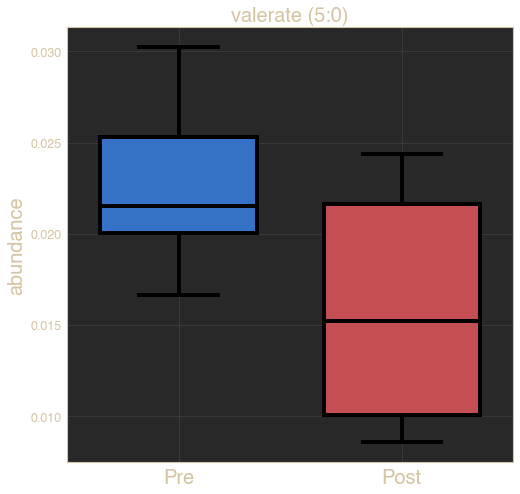

In [270]:
import matplotlib.pyplot as plt

def boxplot(ax, biochem):
    title = biochem if (len(biochem) <= 16) else biochem[:len(biochem) // 2] + "\n-" \
        + biochem[len(biochem) // 2:]
    ax.set_title(title, fontsize=20, wrap=True)
    ax.set_ylabel("abundance", fontsize=20)
    plot = ax.boxplot([pre[biochem], post[biochem]], 
                patch_artist=True, 
                boxprops=dict(facecolor="b", lw=4),
                whiskerprops=dict(lw = 4),
                capprops=dict(lw = 4),
                medianprops=dict(color = 'black', lw = 4),
               widths=0.7)
    ax.set_xticklabels(['Pre', 'Post'], fontsize=20)
    for patch, color in zip(plot['boxes'], ['b', 'r']):
        patch.set_facecolor(color)
    
# test on valerate
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
boxplot(ax, 'valerate (5:0)')

plt.savefig('../output/boxplot_example.png')
plt.show()

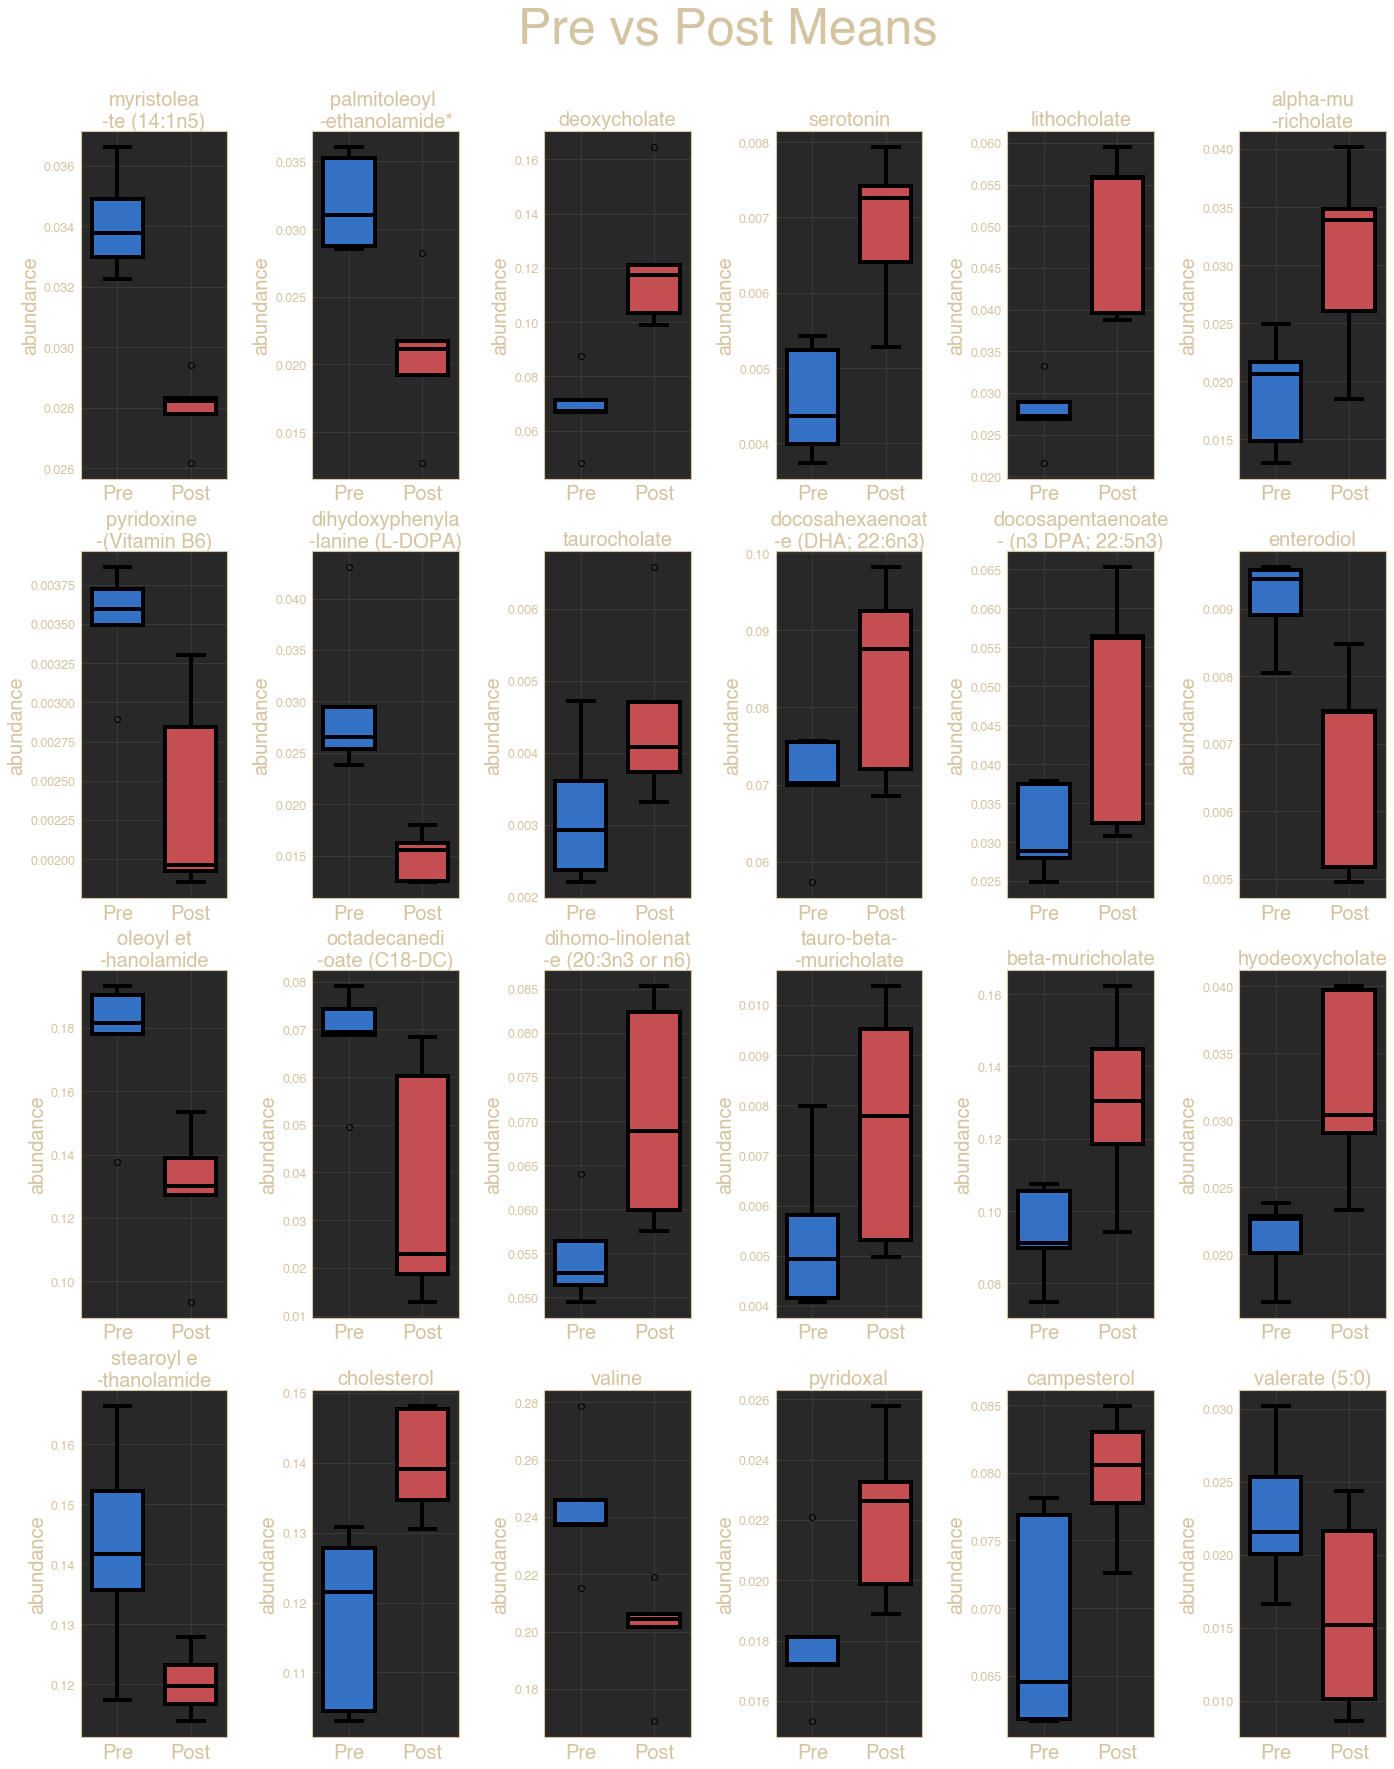

In [281]:
from matplotlib.pyplot import figure

fig, axs = plt.subplots(4,6,figsize=(20, 24))

fig.tight_layout(pad=5)

for ax, biochem in zip(axs.flat, box_list):
    boxplot(ax, biochem)
    
plt.figtext(.5, 1.02,'Pre vs Post Means',fontsize=50,ha='center')

plt.savefig('../output/boxplots.png')
plt.show()

<Figure size 432x288 with 0 Axes>